# Shubh Sinha - 210968172

## WEEK 05 - IMPLEMENTING RECURRENT NEURAL NETWORKS FOR TIME SERIES FORECASTING AND STOCK MARK PREDICTION 

### Q1) Use the following code to generate a time series:


In [1]:
import numpy as np

#creating a time series producing function
def generate_time_series(sample_size, n_steps):
 freq1, freq2, offsets1, offsets2 = np.random.rand(4, sample_size, 1)
 time = np.linspace(0, 1, n_steps)
 series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10)) #wave1+
 series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) #wave2+
 series += 0.1 * (np.random.rand(sample_size, n_steps) - 0.5) #noise
 return series[..., np.newaxis].astype(np.float32)

#### Use the above code to do the following:

##### A) Create a dataset of 10,000 samples with 51 time steps each (Note: the 51st time step should be used as the label)

In [2]:
#generating the time series dataset using the generate_time_series function
sampleSize = 10000
nSteps = 50

series = generate_time_series(sampleSize, nSteps)

In [3]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

C:\Users\codes\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


##### B) Split the dataset in the ratio training: validation: testing = 70:20:10.

In [4]:
X_train, y_train = series[:7000, :nSteps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :nSteps], series[7000:9000, -1]
X_test, y_test = series[9000:, :nSteps], series[9000:, -1]

##### C) Design, train, test and compare the performances of the following on the prediction of the value of 51st time step in the generated time series.

###### a. Fully connected neural network.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 51 (204.00 Byte)
Trainable params: 51 (204.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
219/219 [==============================] - 1s 2ms/step - loss: 0.0435 - mae: 0.1537 - val_loss: 0.0128 - val_mae: 0.0891
Epoch 2/30
219/219 [==============================] - 0s 2ms/step - loss: 0.0069 - mae: 0.0649 - val_loss: 0.0039 - val_mae: 0.0499
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.0030 - mae: 0.0438 - val_loss: 0.0025 - val_mae: 0.0403
Epoch 4/30
219/219 [

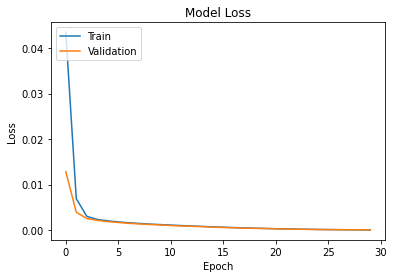

In [5]:
#FCNN

fcnn_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50,1]),
    keras.layers.Dense(1)
])

fcnn_model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["mae"])
fcnn_model.summary()

epochs = 30
history = fcnn_model.fit(X_train, y_train, epochs=epochs, validation_data=(X_valid, y_valid))

fig=plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

###### b. Simple RNN with one layer (output layer)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
219/219 [==============================] - 3s 9ms/step - loss: 0.0336 - mae: 0.1559 - val_loss: 0.0231 - val_mae: 0.1295
Epoch 2/50
219/219 [==============================] - 2s 8ms/step - loss: 0.0173 - mae: 0.1118 - val_loss: 0.0113 - val_mae: 0.0905
Epoch 3/50
219/219 [==============================] - 2s 9ms/step - loss: 0.0083 - mae: 0.0769 - val_loss: 0.0054 - val_mae: 0.0618
Epoch 4/50
219/219 [==============================] - 2s 9ms/step - loss: 0.0043 - mae: 0.0545 - val_loss: 0.0032 - val_mae: 0.0467
Epoch 5/50
219/219 [==

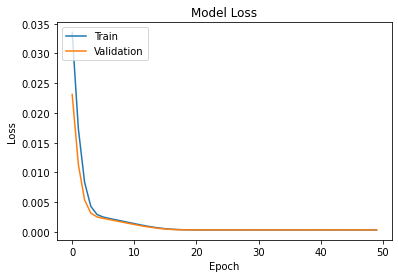

In [6]:
#RNN model with output layer
rnn_model1 = keras.models.Sequential([
     keras.layers.SimpleRNN(1, input_shape=[None,1])
])

rnn_model1.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["mae"])
rnn_model1.summary()

epochs = 50
history = rnn_model1.fit(X_train, y_train, epochs=epochs, validation_data=(X_valid, y_valid))

fig=plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

###### c. Simple RNN with one hidden layer and one output layer.

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, None, 20)          440       
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 1)                 22        
                                                                 
Total params: 462 (1.80 KB)
Trainable params: 462 (1.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/80
219/219 [==============================] - 7s 24ms/step - loss: 0.0317 - mae: 0.1174 - val_loss: 0.0052 - val_mae: 0.0577
Epoch 2/80
219/219 [==============================] - 5s 23ms/step - loss: 0.0032 - mae: 0.0455 - val_loss: 0.0023 - val_mae: 0.0387
Epoch 3/80
219/219 [==============================] - 5s 23ms/step - loss: 0.0020 - mae: 0.0362 - val_loss: 0.0017 - val_mae: 0.0331
Epoch 4/80
219/219 [=

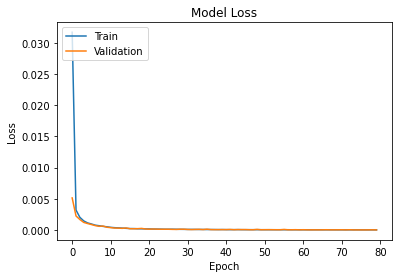

In [7]:
#RNN model with one hidden layer
rnn_model2 = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None,1]),
    keras.layers.SimpleRNN(1)
])

rnn_model2.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["mae"])
rnn_model2.summary()
epochs = 80
history = rnn_model2.fit(X_train, y_train, epochs=epochs, validation_data=(X_valid, y_valid))

fig=plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

###### e. Simple RNN with two hidden layers and one output layer.

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, None, 20)          440       
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 20)          820       
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 1)                 22        
                                                                 
Total params: 1282 (5.01 KB)
Trainable params: 1282 (5.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/80
219/219 [==============================] - 10s 37ms/step - loss: 0.0067 - mae: 0.0537 - val_loss: 0.0012 - val_mae: 0.0281
Epoch 2/80
219/219 [==============================] - 8s 34ms/step - loss: 9.0456e-04 - mae: 0.0237 - val_loss: 6.2620e-04 - val_mae: 0.0198
Epoch 3/80


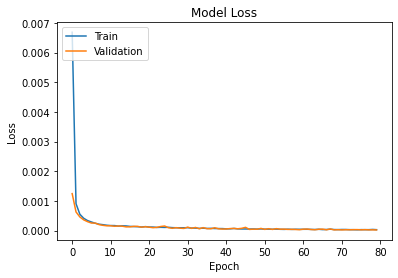

In [8]:
#RNN model with two hidden layers
rnn_model3 = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None,1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)
])

rnn_model3.compile(loss="mse",optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["mae"])
rnn_model3.summary()
epochs = 80
history = rnn_model3.fit(X_train, y_train, epochs=epochs, validation_data=(X_valid, y_valid))

fig=plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Q2) Consider the Google Stock Prediction dataset.


In [10]:
#importing the dataset as a dataframe
df = pd.read_csv("GOOG.csv")

#displaying the dataframe
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [11]:
df['date']= pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   symbol       1258 non-null   object             
 1   date         1258 non-null   datetime64[ns, UTC]
 2   close        1258 non-null   float64            
 3   high         1258 non-null   float64            
 4   low          1258 non-null   float64            
 5   open         1258 non-null   float64            
 6   volume       1258 non-null   int64              
 7   adjClose     1258 non-null   float64            
 8   adjHigh      1258 non-null   float64            
 9   adjLow       1258 non-null   float64            
 10  adjOpen      1258 non-null   float64            
 11  adjVolume    1258 non-null   int64              
 12  divCash      1258 non-null   float64            
 13  splitFactor  1258 non-null   float64            
dtypes: datetime64[ns, UTC](1

In [12]:
df.isnull().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [13]:
#no NULL values found

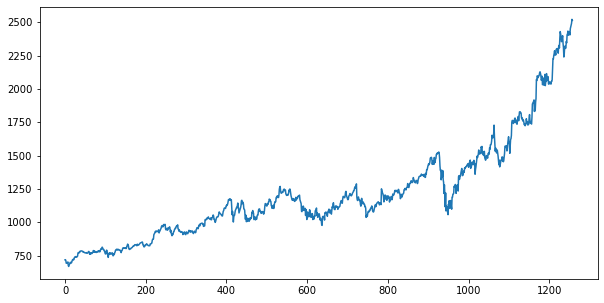

In [14]:
plt.figure(figsize=(10,5))
plt.plot(df['adjClose'])
plt.show()

In [15]:
#scaling the values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[["scaledClose"]] = scaler.fit_transform(df[["close"]])
df[["scaledHigh"]] = scaler.fit_transform(df[["high"]])
df[["scaledLow"]] = scaler.fit_transform(df[["low"]])
df[["scaledOpen"]] = scaler.fit_transform(df[["open"]])
df[["scaledVolume"]] = scaler.fit_transform(df[["volume"]])
df[["scaledAdjClose"]] = scaler.fit_transform(df[["adjClose"]])
df[["scaledAdjHigh"]] = scaler.fit_transform(df[["adjHigh"]])
df[["scaledAdjLow"]] = scaler.fit_transform(df[["adjLow"]])
df[["scaledAdjOpen"]] = scaler.fit_transform(df[["adjOpen"]])
df[["scaledAdjVolume"]] = scaler.fit_transform(df[["adjVolume"]])

In [16]:
#dropping the irrelevant columns
df_scaled = df.drop(['close', 'high', 'low', 'open', 'volume', 'adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume'], axis=1)

In [18]:
#new dataframe
df_scaled

,symbol,date,divCash,splitFactor,scaledClose,scaledHigh,scaledLow,scaledOpen,scaledVolume,scaledAdjClose,scaledAdjHigh,scaledAdjLow,scaledAdjOpen,scaledAdjVolume
0,GOOG,2016-06-14 00:00:00+00:00,0.0,1.0,0.026984,0.027050,0.027158,0.024532,0.163697,0.026984,0.027050,0.027158,0.024532,0.163697
1,GOOG,2016-06-15 00:00:00+00:00,0.0,1.0,0.027334,0.027325,0.029442,0.025891,0.148076,0.027334,0.027325,0.029442,0.025891,0.148076
2,GOOG,2016-06-16 00:00:00+00:00,0.0,1.0,0.022716,0.023912,0.021785,0.023685,0.279120,0.022716,0.023912,0.021785,0.023685,0.279120
3,GOOG,2016-06-17 00:00:00+00:00,0.0,1.0,0.012658,0.019691,0.013715,0.020308,0.521410,0.012658,0.019691,0.013715,0.020308,0.521410
4,GOOG,2016-06-20 00:00:00+00:00,0.0,1.0,0.013732,0.016272,0.016417,0.014979,0.296195,0.013732,0.016272,0.016417,0.014979,0.296195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,0.0,1.0,0.970049,0.968194,0.968819,0.960300,0.144311,0.970049,0.968194,0.968819,0.960300,0.144311
1254,GOOG,2021-06-08 00:00:00+00:00,0.0,1.0,0.979092,0.982480,0.983624,0.975716,0.154686,0.979092,0.982480,0.983624,0.975716,0.154686
1255,GOOG,2021-06-09 00:00:00+00:00,0.0,1.0,0.983705,0.988144,0.994027,0.986289,0.112552,0.983705,0.988144,0.994027,0.986289,0.112552
1256,GOOG,2021-06-10 00:00:00+00:00,0.0,1.0,1.000000,0.997989,0.997662,0.983327,0.207325,1.000000,0.997989,0.997662,0.983327,0.207325


In [19]:
#filtering data for the years 2020 and 2021
data = df_scaled[(df_scaled['date'].dt.year >= 2020) & (df_scaled['date'].dt.year <= 2021)]

In [20]:
input_cols = ['scaledClose', 'scaledHigh', 'scaledLow', 'scaledOpen', 'scaledVolume', 'scaledAdjClose', 
              'scaledAdjHigh', 'scaledAdjLow', 'scaledAdjOpen', 'scaledAdjVolume']

#predicting the scaled close price
target_col = 'scaledClose' 

In [21]:
X = data[input_cols].values
y = data[target_col].values

In [22]:
#splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
#reshaping input data for RNN
X_train = X_train.reshape(-1, 1, len(input_cols))
X_test = X_test.reshape(-1, 1, len(input_cols))

#### A. Build a Simple RNN model with 5 layers (use dropouts if required) to predict the stock price for the years 2020 and 2021.

In [24]:
from tensorflow.keras.layers import SimpleRNN,Dropout,Dense
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
model = Sequential([
    SimpleRNN(64, activation='relu', input_shape=(1, len(input_cols)), return_sequences=True),
    Dropout(0.2),
    SimpleRNN(32, activation='relu', return_sequences=True),
    Dropout(0.2),
    SimpleRNN(16, activation='relu', return_sequences=True),
    Dropout(0.2),
    SimpleRNN(8, activation='relu'),
    Dense(1)  # Output layer
])

In [25]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, 1, 64)             4800      
                                                                 
 dropout (Dropout)           (None, 1, 64)             0         
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 1, 32)             3104      
                                                                 
 dropout_1 (Dropout)         (None, 1, 32)             0         
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, 1, 16)             784       
                                                                 
 dropout_2 (Dropout)         (None, 1, 16)             0         
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, 8)                

##### B. Compare the accuracy using MAPE and MSE. 


In [31]:
#training the model
model.fit(X_train, y_train, epochs=80, batch_size=32, validation_split=0.2)

#making predictions
y_pred = model.predict(X_test)

#calculating MAPE and MSE
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"MAPE: {mape:.2f}%")
print(f"MSE: {mse:.4f}")

Epoch 1/80
8/8 [==============================] - 0s 11ms/step - loss: 2.2851e-05 - mae: 0.0038 - val_loss: 5.2862e-05 - val_mae: 0.0051
Epoch 2/80
8/8 [==============================] - 0s 7ms/step - loss: 2.3108e-05 - mae: 0.0038 - val_loss: 5.2243e-05 - val_mae: 0.0051
Epoch 3/80
8/8 [==============================] - 0s 8ms/step - loss: 2.2236e-05 - mae: 0.0037 - val_loss: 4.8554e-05 - val_mae: 0.0051
Epoch 4/80
8/8 [==============================] - 0s 8ms/step - loss: 2.3718e-05 - mae: 0.0038 - val_loss: 5.1013e-05 - val_mae: 0.0053
Epoch 5/80
8/8 [==============================] - 0s 7ms/step - loss: 2.2488e-05 - mae: 0.0037 - val_loss: 4.9634e-05 - val_mae: 0.0051
Epoch 6/80
8/8 [==============================] - 0s 7ms/step - loss: 2.1068e-05 - mae: 0.0036 - val_loss: 4.9315e-05 - val_mae: 0.0050
Epoch 7/80
8/8 [==============================] - 0s 7ms/step - loss: 2.0649e-05 - mae: 0.0035 - val_loss: 4.8087e-05 - val_mae: 0.0050
Epoch 8/80
8/8 [==============================]

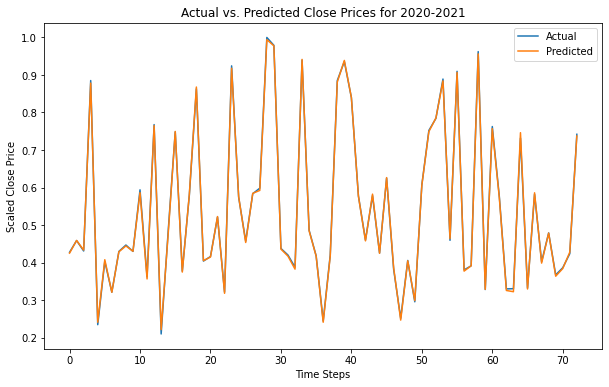

In [32]:
import matplotlib.pyplot as plt

#inversing scaling to get actual values
y_test_actual = y_test
y_test_predicted = y_pred

#plotting
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual')
plt.plot(y_test_predicted, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Scaled Close Price')
plt.title('Actual vs. Predicted Close Prices for 2020-2021')
plt.legend()
plt.show()

Epoch 1/30
8/8 [==============================] - 4s 81ms/step - loss: 0.1783 - mae: 0.3883 - val_loss: 0.1015 - val_mae: 0.2797
Epoch 2/30
8/8 [==============================] - 0s 11ms/step - loss: 0.0568 - mae: 0.1909 - val_loss: 0.0114 - val_mae: 0.0809
Epoch 3/30
8/8 [==============================] - 0s 7ms/step - loss: 0.0416 - mae: 0.1655 - val_loss: 0.0076 - val_mae: 0.0642
Epoch 4/30
8/8 [==============================] - 0s 7ms/step - loss: 0.0356 - mae: 0.1485 - val_loss: 0.0156 - val_mae: 0.1039
Epoch 5/30
8/8 [==============================] - 0s 9ms/step - loss: 0.0353 - mae: 0.1398 - val_loss: 0.0162 - val_mae: 0.1061
Epoch 6/30
8/8 [==============================] - 0s 10ms/step - loss: 0.0280 - mae: 0.1289 - val_loss: 0.0094 - val_mae: 0.0776
Epoch 7/30
8/8 [==============================] - 0s 8ms/step - loss: 0.0252 - mae: 0.1183 - val_loss: 0.0079 - val_mae: 0.0696
Epoch 8/30
8/8 [==============================] - 0s 9ms/step - loss: 0.0222 - mae: 0.1172 - val_loss

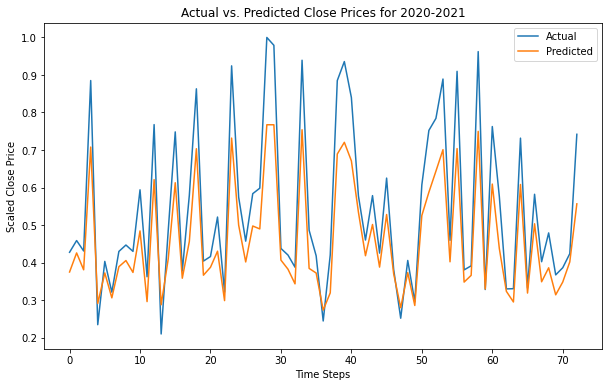

In [33]:
model = Sequential([
    SimpleRNN(64, activation='relu', input_shape=(1, len(input_cols)), return_sequences=True),
    Dropout(0.2),
    SimpleRNN(32, activation='relu', return_sequences=True),
    Dropout(0.2),
    SimpleRNN(16, activation='relu', return_sequences=True),
    Dropout(0.2),
    SimpleRNN(8, activation='relu'),
    Dense(1)  # Output layer
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])
# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Make predictions
y_pred = model.predict(X_test)

# Calculate MAPE and MSE
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"MAPE: {mape:.2f}%")
print(f"MSE: {mse:.4f}")
# Inverse scaling to get actual values
y_test_actual = y_test
y_test_predicted = y_pred

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual')
plt.plot(y_test_predicted, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Scaled Close Price')
plt.title('Actual vs. Predicted Close Prices for 2020-2021')
plt.legend()
plt.show()

Epoch 1/50
8/8 [==============================] - 4s 70ms/step - loss: 0.3631 - mae: 0.5728 - val_loss: 0.2935 - val_mae: 0.5036
Epoch 2/50
8/8 [==============================] - 0s 7ms/step - loss: 0.2764 - mae: 0.4947 - val_loss: 0.2432 - val_mae: 0.4512
Epoch 3/50
8/8 [==============================] - 0s 6ms/step - loss: 0.2192 - mae: 0.4366 - val_loss: 0.1781 - val_mae: 0.3792
Epoch 4/50
8/8 [==============================] - 0s 8ms/step - loss: 0.1522 - mae: 0.3567 - val_loss: 0.1094 - val_mae: 0.2849
Epoch 5/50
8/8 [==============================] - 0s 7ms/step - loss: 0.0809 - mae: 0.2491 - val_loss: 0.0452 - val_mae: 0.1747
Epoch 6/50
8/8 [==============================] - 0s 9ms/step - loss: 0.0246 - mae: 0.1219 - val_loss: 0.0125 - val_mae: 0.0870
Epoch 7/50
8/8 [==============================] - 0s 7ms/step - loss: 0.0083 - mae: 0.0764 - val_loss: 0.0152 - val_mae: 0.1026
Epoch 8/50
8/8 [==============================] - 0s 6ms/step - loss: 0.0109 - mae: 0.0899 - val_loss: 

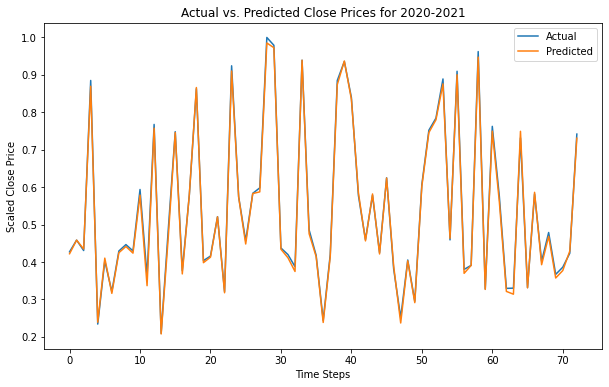

In [34]:
model = Sequential([
    SimpleRNN(64, activation='relu', input_shape=(1, len(input_cols)), return_sequences=True),
    #Dropout(0.2),
    SimpleRNN(32, activation='relu', return_sequences=True),
    #Dropout(0.2),
    SimpleRNN(16, activation='relu', return_sequences=True),
    #Dropout(0.2),
    SimpleRNN(8, activation='relu'),
    Dense(1)  # Output layer
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Make predictions
y_pred = model.predict(X_test)

# Calculate MAPE and MSE
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"MAPE: {mape:.2f}%")
print(f"MSE: {mse:.4f}")
# Inverse scaling to get actual values
y_test_actual = y_test
y_test_predicted = y_pred

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual')
plt.plot(y_test_predicted, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Scaled Close Price')
plt.title('Actual vs. Predicted Close Prices for 2020-2021')
plt.legend()
plt.show()

##### C. Comment on how many epochs (dropouts) is required for adequate learning. 

In [35]:
#50 epochs is required for adequate learning

##### D. Plot the actual vs predicted values using the test data for the year 2020 and 2021 .

In [36]:
#plotted for different epochs cases above